# Laboratorio III

## Imports

In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Parte 1

### Apartado (a)

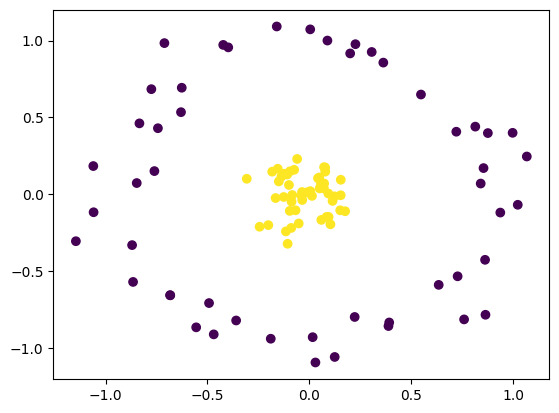

In [57]:
# abrir csv's usando csv.reader
with open('y_laboratorio_AAA.csv') as csvfile:
    y = np.array(list(csv.reader(csvfile))).astype(int)
    
with open('X_laboratorio_AAA.csv') as csvfile:
    X = np.array(list(csv.reader(csvfile))).astype(float)

# de momento solo consideramos dos features
X = X[:,0:2]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.show()

### Apartados (b), (c) y (d)

In [87]:
# Gradient Descent
lambda_reg = 1.0
n, m = X.shape
learning_rate = 0.01
iterations = 200

w = np.random.uniform(-0.5, 0.5, m)

losses = []
accuracies = []

for _ in range(iterations):  
    gradient_loss = np.mean((-y * X) / (1 + np.exp(-np.dot(y.T, np.dot(X, w)))))
    gradient_reg = 2 * lambda_reg * w
    gradient = gradient_loss + gradient_reg
    w -= learning_rate * gradient
    print(gradient_loss)
    losses.append(gradient_loss)
    predictions = np.sign(np.dot(X, w))
    accuracy = np.mean(predictions == y.flatten())
    accuracies.append(accuracy)

    
plt.plot(range(iterations), losses)
plt.title('Loss')
plt.show()

plt.plot(range(iterations), accuracies)
plt.title('Accuracy')
plt.show()

# w es perpendicular a la recta que separa las dos clases. La recta que separa ambas clases es la f(X) = w*X
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis') # datos originales

# recordemos que sing(w*x) es la función de decisión, por lo que la recta que separa las dos clases es w*X = 0
# para graficar la recta, despejamos x_2 de la ecuación w*X = 0, obteniendo x_2 = -w_1*x_1/w_2
# cojo dos puntos para graficar la recta
x1 = np.array([min(X[:,0]), max(X[:,0])]) # cojo dos x_1 cualesquiera, en este caso el minimo y el máximo para que la recta este en el rango de los datos
x2 = -w[0] * x1 / w[1] # cálculo su correspondiente x_2
plt.plot(x1, x2)
plt.show()

ValueError: operands could not be broadcast together with shapes (2,100) (2,) 

## Parte 2

### Apartados (a) y (b)

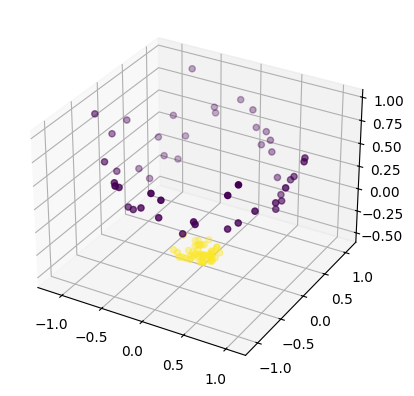

In [9]:
# abrir csv's usando csv.reader
with open('y_laboratorio_AAA.csv') as csvfile:
    y = np.array(list(csv.reader(csvfile))).astype(int)
    
with open('X_laboratorio_AAA.csv') as csvfile:
    X = np.array(list(csv.reader(csvfile))).astype(float)

# de momento solo consideramos dos features
X = X[:,0:2]

def transform(X):
    # φ(x1, x2) = (x1, x2, x_1² + x_2² − 1/2)
    return np.array([X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2 - 0.5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = transform(X).T
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='viridis')
plt.show()

### Apartados (c) y (d)

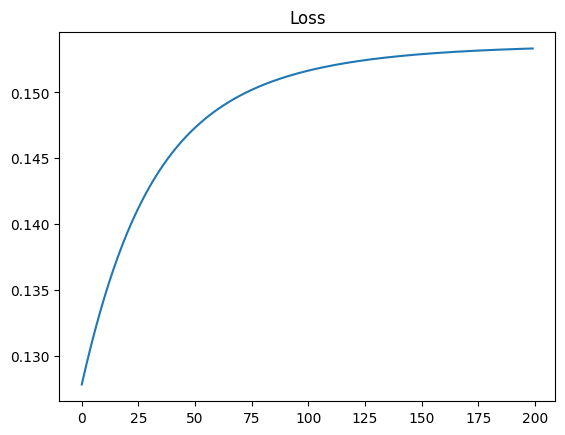

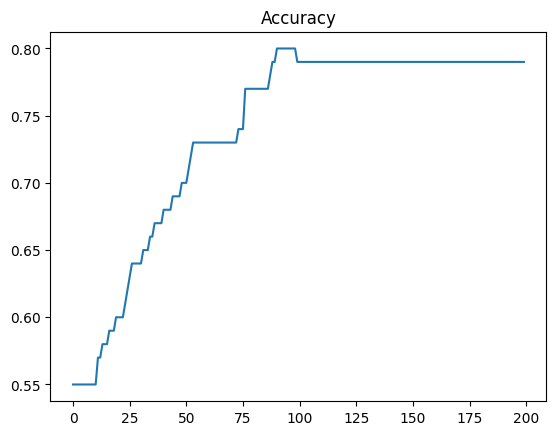

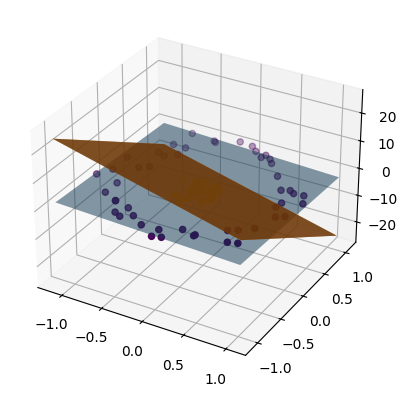

In [35]:
# Gradient Descent
lambda_reg = 1.0
n, m = X.shape
learning_rate = 0.01
iterations = 200

w_original = np.random.uniform(-0.5, 0.5, m)
w = np.copy(w_original)
losses = []
accuracies = []

for _ in range(iterations):
    gradient_loss = np.mean((-y * X) / (1 + np.exp(-np.dot(y.T, np.dot(X, w)))))
    gradient_reg = 2 * lambda_reg * w
    gradient = gradient_loss + gradient_reg

    losses.append(gradient_loss)
    predictions = np.sign(np.dot(X, w))
    accuracy = np.mean(predictions == y.flatten())
    accuracies.append(accuracy)
    
    w -= learning_rate * gradient
    
plt.plot(range(iterations), losses)
plt.title('Loss')
plt.show()

plt.plot(range(iterations), accuracies)
plt.title('Accuracy')
plt.show()

# Nuevamente, w es perpendicular al plano que separa las dos clases. La recta que separa ambas clases es la función de decisión f(X) = w*X
# La función de decisión es f(X) = w*X = 0
# Para graficar el plano, despejamos x_3 de la ecuación w*X = 0, obteniendo x_3 = -w_1*x_1 - w_2*x_2 / w_3
# Cojo dos puntos para graficar el plano

# w tras gradient descent
x1 = np.array([min(X[:,0]), max(X[:,0])]) 
x2 = np.array([min(X[:,1]), max(X[:,1])])
x1, x2 = np.meshgrid(x1, x2)
x3 = (-w[0] * x1 - w[1] * x2) / w[2]

# w original
x4 = np.array([min(X[:,0]), max(X[:,0])]) 
x5 = np.array([min(X[:,1]), max(X[:,1])])
x4, x5 = np.meshgrid(x1, x2)
x6 = (-w_original[0] * x4 - w_original[1] * x5) / w_original[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='viridis')
ax.plot_surface(x1, x2, x3, alpha=0.5)
ax.plot_surface(x4, x5, x6, alpha=0.5)

plt.show()
